In [34]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor


In [35]:
df  = pd.read_csv('/content/students_responses_main.csv')
df_org = df.copy()
df

,Timestamp,Kindly specify your Gender?,Kindly mention your age?,How many members are in your family?,Please specify where are you currently living?,Please mention your parents status?,Kindly tell us about your guardian.,Kindly select your father's education from these options.,Kindly select your mother's education from these options.,Please select your father/guardian monthly Income from these options.,...,Please fill the form. [Do you take nutritions.],Please fill the form. [Do you love sports?],Please fill the form. [Do you value and have confidence of your opinions?],Please fill the form. [Do you take enough sleep? (7-8 hours)],Please fill the form. [Do you do self-directed learning?],Please fill the form. [Do you have depression of study?],Please fill the form. [Do you have believe that you will be succeed in semester in which you are studying.],Please fill the form. [Are atmospheric conditions such as high temperature and humidity tend you to lower mental efficiency.],Please fill the form. [Do you do planning for study?],Please fill the form. [how often you are regular in doing same thing? (any task)]
0,2022/03/08 4:22:49 PM GMT+5,Male,19,5,Own House,Other,Father,Graduation,Graduation,Between 75k to 100k,...,Sometimes,Always,Always,Rarely,Always,Often,Always,Often,Always,Often
1,2022/03/08 4:23:18 PM GMT+5,Female,19,3,Own House,Together,Both Mother & Father,Graduation,Graduation,Between 50k to 75k,...,Sometimes,Often,Always,Often,Often,Often,Often,Always,Often,Often
2,2022/03/08 4:24:10 PM GMT+5,Female,19,5,Own House,Together,Both Mother & Father,Graduation,Graduation,Between 100k to 150k,...,Always,Sometimes,Always,Sometimes,Always,Always,Often,Sometimes,Always,Always
3,2022/03/08 4:25:13 PM GMT+5,Male,23,6,Own House,Together,Both Mother & Father,Graduation,Matric,Between 50k to 75k,...,Sometimes,Always,Often,Always,Often,Always,Always,Never,Always,Often
4,2022/03/08 4:25:14 PM GMT+5,Male,21,6,Rented House,Together,Both Mother & Father,Graduation,Matric,Between 150k to 200k,...,Often,Always,Always,Always,Always,Rarely,Always,Often,Rarely,Often
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,2022/04/20 1:22:57 PM GMT+5,Female,22,5,Rented House,Together,Both Mother & Father,PHD,Master,Between 450k to 500k,...,Always,Always,Always,Always,Often,Often,Often,Sometimes,Sometimes,Often
639,2022/04/20 1:23:10 PM GMT+5,Male,21,5,Own House,Together,Relative,PHD,Master,Between 500k to 550k,...,Sometimes,Sometimes,Often,Rarely,Often,Often,Often,Often,Often,Often
640,2022/04/20 1:28:33 PM GMT+5,Male,22,5,Own House,Together,Father,Graduation,Graduation,Between 75k to 100k,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,Rarely,Sometimes,Rarely,Sometimes,Sometimes
641,2022/04/20 1:34:56 PM GMT+5,Male,26,7,Rented House,Together,Both Mother & Father,Matric,Primary,Father don't do any job,...,Never,Rarely,Sometimes,Sometimes,Rarely,Never,Sometimes,Never,Rarely,Rarely


In [36]:
df.drop(columns= df.columns[88],inplace=True)
df.drop(columns= df.columns[74],inplace=True)
df.drop(columns= df.columns[58],inplace=True)
df.drop(columns = df.columns[12:50],inplace = True)
df.drop(columns= df.columns[10],inplace=True)
df.drop(columns= df.columns[8],inplace=True)
df.drop(columns= df.columns[7],inplace=True)
df.drop(columns= df.columns[0],inplace=True)

In [37]:
df['Kindly choose your current semester.']=df['Kindly choose your current semester.'].str.replace('2 Semester','1 Semester',regex=True).str.replace('3 Semester','2 Semester',regex=True) .str.replace ('4 Semester','3 Semester',regex=True).str.replace ('5 Semester','4 Semester',regex=True).str.replace ('6 Semester','5 Semester',regex=True).str.replace('7 Semester','6 Semester',regex=True).str.replace('8 Semester','7 Semester',regex=True)

In [38]:

df['Your matric marks percentage?'] = np.where(df['Your matric marks percentage?'] > 100,
                                               df['Your matric marks percentage?'] * 100 / 1100,
                                               df['Your matric marks percentage?'])


df["Your Fsc/Ics marks percentage?"] = np.where(df["Your Fsc/Ics marks percentage?"] > 100,
                                                df["Your Fsc/Ics marks percentage?"]* 100/1100,
                                                df["Your Fsc/Ics marks percentage?"])

In [39]:
df.round(decimals =2)

,Kindly specify your Gender?,Kindly mention your age?,How many members are in your family?,Please specify where are you currently living?,Please mention your parents status?,Kindly tell us about your guardian.,Please select your father/guardian monthly Income from these options.,Please select your monthly Income ?,Please mention your Previous Semester GPA?,Your matric marks percentage?,...,Please fill the form. [Do you take nutritions.],Please fill the form. [Do you love sports?],Please fill the form. [Do you value and have confidence of your opinions?],Please fill the form. [Do you take enough sleep? (7-8 hours)],Please fill the form. [Do you do self-directed learning?],Please fill the form. [Do you have depression of study?],Please fill the form. [Do you have believe that you will be succeed in semester in which you are studying.],Please fill the form. [Are atmospheric conditions such as high temperature and humidity tend you to lower mental efficiency.],Please fill the form. [Do you do planning for study?],Please fill the form. [how often you are regular in doing same thing? (any task)]
0,Male,19,5,Own House,Other,Father,Between 75k to 100k,Between 10k to 25k,2.60,90.00,...,Sometimes,Always,Always,Rarely,Always,Often,Always,Often,Always,Often
1,Female,19,3,Own House,Together,Both Mother & Father,Between 50k to 75k,Between 10k to 25k,2.80,89.00,...,Sometimes,Often,Always,Often,Often,Often,Often,Always,Often,Often
2,Female,19,5,Own House,Together,Both Mother & Father,Between 100k to 150k,Don't do freelancing,2.69,91.00,...,Always,Sometimes,Always,Sometimes,Always,Always,Often,Sometimes,Always,Always
3,Male,23,6,Own House,Together,Both Mother & Father,Between 50k to 75k,Between 100k to 150k,2.40,92.17,...,Sometimes,Always,Often,Always,Often,Always,Always,Never,Always,Often
4,Male,21,6,Rented House,Together,Both Mother & Father,Between 150k to 200k,Don't do freelancing,3.10,89.00,...,Often,Always,Always,Always,Always,Rarely,Always,Often,Rarely,Often
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,Female,22,5,Rented House,Together,Both Mother & Father,Between 450k to 500k,Less than 10k,2.60,88.00,...,Always,Always,Always,Always,Often,Often,Often,Sometimes,Sometimes,Often
639,Male,21,5,Own House,Together,Relative,Between 500k to 550k,Don't do freelancing,3.35,85.00,...,Sometimes,Sometimes,Often,Rarely,Often,Often,Often,Often,Often,Often
640,Male,22,5,Own House,Together,Father,Between 75k to 100k,Don't do freelancing,3.40,83.00,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,Rarely,Sometimes,Rarely,Sometimes,Sometimes
641,Male,26,7,Rented House,Together,Both Mother & Father,Father don't do any job,Don't do freelancing,2.83,90.00,...,Never,Rarely,Sometimes,Sometimes,Rarely,Never,Sometimes,Never,Rarely,Rarely


In [40]:
df.describe()

,Kindly mention your age?,How many members are in your family?,Please mention your Previous Semester GPA?,Your matric marks percentage?,Your Fsc/Ics marks percentage?,Please mention your NTS score?,How much you have interest in this domain,Are you satisfied with your program selection?,Please provide your current CGPA?,Do you find your CS/SE subjects difficult?,Do you love your subjects?,How is your health,Do you like your teacher methodology,Kindly specify do you love travelling?,Do you love reading books?
count,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,636.000000,643.000000,643.000000,643.000000,643.000000,640.000000,640.000000,643.000000,643.000000
mean,20.371695,5.928460,3.009611,86.826523,81.505692,76.205941,3.869497,3.723173,2.976409,3.321928,3.225505,3.725000,3.151562,4.000000,2.970451
std,2.505497,4.390004,4.386389,10.362734,29.511367,23.514766,1.069379,1.167262,3.883473,1.012662,1.041433,1.062669,1.060235,1.197089,1.317530
min,17.000000,1.000000,0.000100,0.100000,0.100000,0.100000,1.000000,1.000000,0.000010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,5.000000,2.500000,84.000000,75.000000,72.000000,3.000000,3.000000,2.600000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000
50%,20.000000,6.000000,2.830000,89.000000,82.000000,79.000000,4.000000,4.000000,2.890000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000
75%,21.000000,6.000000,3.200000,92.000000,86.000000,84.000000,5.000000,5.000000,3.160000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000
max,69.000000,108.000000,100.000000,100.000000,788.909091,420.000000,5.000000,5.000000,100.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [41]:
df = df.select_dtypes(include=['number'])
Q1 = df.quantile(0.15)
Q3 = df.quantile(0.85)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df

,Kindly mention your age?,How many members are in your family?,Please mention your Previous Semester GPA?,Your matric marks percentage?,Your Fsc/Ics marks percentage?,Please mention your NTS score?,How much you have interest in this domain,Are you satisfied with your program selection?,Please provide your current CGPA?,Do you find your CS/SE subjects difficult?,Do you love your subjects?,How is your health,Do you like your teacher methodology,Kindly specify do you love travelling?,Do you love reading books?
0,19,5,2.60,90.00,70.0,70.0,4.0,4,2.60,3,3,3.0,3.0,4,3
1,19,3,2.80,89.00,83.0,72.0,5.0,5,2.50,3,3,4.0,3.0,5,4
2,19,5,2.69,91.00,83.0,82.0,4.0,4,2.62,4,4,3.0,2.0,5,5
3,23,6,2.40,92.17,70.0,72.0,4.0,4,2.67,5,4,4.0,1.0,5,3
4,21,6,3.10,89.00,80.0,68.0,4.0,4,3.00,3,3,5.0,3.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,22,5,2.60,88.00,85.0,77.0,4.0,4,2.60,3,3,4.0,5.0,5,5
639,21,5,3.35,85.00,75.0,88.0,4.0,4,2.85,4,4,4.0,4.0,3,3
640,22,5,3.40,83.00,84.0,64.0,4.0,5,3.11,3,5,4.0,5.0,5,5
641,26,7,2.83,90.00,78.0,62.0,5.0,4,2.83,4,4,4.0,4.0,5,4


In [42]:
df.describe()

,Kindly mention your age?,How many members are in your family?,Please mention your Previous Semester GPA?,Your matric marks percentage?,Your Fsc/Ics marks percentage?,Please mention your NTS score?,How much you have interest in this domain,Are you satisfied with your program selection?,Please provide your current CGPA?,Do you find your CS/SE subjects difficult?,Do you love your subjects?,How is your health,Do you like your teacher methodology,Kindly specify do you love travelling?,Do you love reading books?
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,570.000000,576.000000,576.000000,576.000000,576.000000,573.000000,573.000000,576.000000,576.000000
mean,20.291667,5.663194,2.844132,87.407890,80.099607,79.042917,3.877193,3.720486,2.890295,3.319444,3.222222,3.727749,3.136126,3.996528,2.960069
std,1.466733,1.365831,0.541953,6.209160,8.396338,8.306247,1.038286,1.131370,0.460065,0.994963,1.012578,1.025487,1.021946,1.178055,1.304228
min,17.000000,2.000000,0.540000,60.000000,50.000000,45.000000,1.000000,1.000000,1.150000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,5.000000,2.550000,84.000000,75.000000,73.000000,3.000000,3.000000,2.640000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000
50%,20.000000,6.000000,2.850000,89.000000,81.000000,79.000000,4.000000,4.000000,2.900000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000
75%,21.000000,6.000000,3.200000,92.000000,85.625000,85.000000,5.000000,5.000000,3.162500,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000
max,26.000000,11.000000,4.000000,99.090909,99.181800,110.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [43]:
def factorize_fun(data):
    obj_cols = data.loc[:, data.dtypes == object].columns
    for col in obj_cols:
        data[col] = pd.factorize(data[col])[0] +1
    return data

df=factorize_fun(df)


In [44]:
# from sklearn.preprocessing import LabelEncoder
# def Encoder(df):
#           columnsToEncode = list(df.select_dtypes(include=['category','object']))
#           le = LabelEncoder()
#           for feature in columnsToEncode:
#               try:
#                   df[feature] = le.fit_transform(df[feature])
#               except:
#                   print('Error encoding '+feature)
#           return df

# df=Encoder(df)
# df

In [45]:
import numpy as np
from sklearn.impute import KNNImputer

def knn_null(df):
    imputer = KNNImputer(n_neighbors=2)
    df1 = imputer.fit_transform(df)
    df2 = pd.DataFrame(df1, columns = df.columns)
    return df2

df=knn_null(df)
df
# df.isnull().sum().to_csv("Testing.csv")

,Kindly mention your age?,How many members are in your family?,Please mention your Previous Semester GPA?,Your matric marks percentage?,Your Fsc/Ics marks percentage?,Please mention your NTS score?,How much you have interest in this domain,Are you satisfied with your program selection?,Please provide your current CGPA?,Do you find your CS/SE subjects difficult?,Do you love your subjects?,How is your health,Do you like your teacher methodology,Kindly specify do you love travelling?,Do you love reading books?
0,19.0,5.0,2.60,90.00,70.0,70.0,4.0,4.0,2.60,3.0,3.0,3.0,3.0,4.0,3.0
1,19.0,3.0,2.80,89.00,83.0,72.0,5.0,5.0,2.50,3.0,3.0,4.0,3.0,5.0,4.0
2,19.0,5.0,2.69,91.00,83.0,82.0,4.0,4.0,2.62,4.0,4.0,3.0,2.0,5.0,5.0
3,23.0,6.0,2.40,92.17,70.0,72.0,4.0,4.0,2.67,5.0,4.0,4.0,1.0,5.0,3.0
4,21.0,6.0,3.10,89.00,80.0,68.0,4.0,4.0,3.00,3.0,3.0,5.0,3.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,22.0,5.0,2.60,88.00,85.0,77.0,4.0,4.0,2.60,3.0,3.0,4.0,5.0,5.0,5.0
572,21.0,5.0,3.35,85.00,75.0,88.0,4.0,4.0,2.85,4.0,4.0,4.0,4.0,3.0,3.0
573,22.0,5.0,3.40,83.00,84.0,64.0,4.0,5.0,3.11,3.0,5.0,4.0,5.0,5.0,5.0
574,26.0,7.0,2.83,90.00,78.0,62.0,5.0,4.0,2.83,4.0,4.0,4.0,4.0,5.0,4.0


Data Normalization

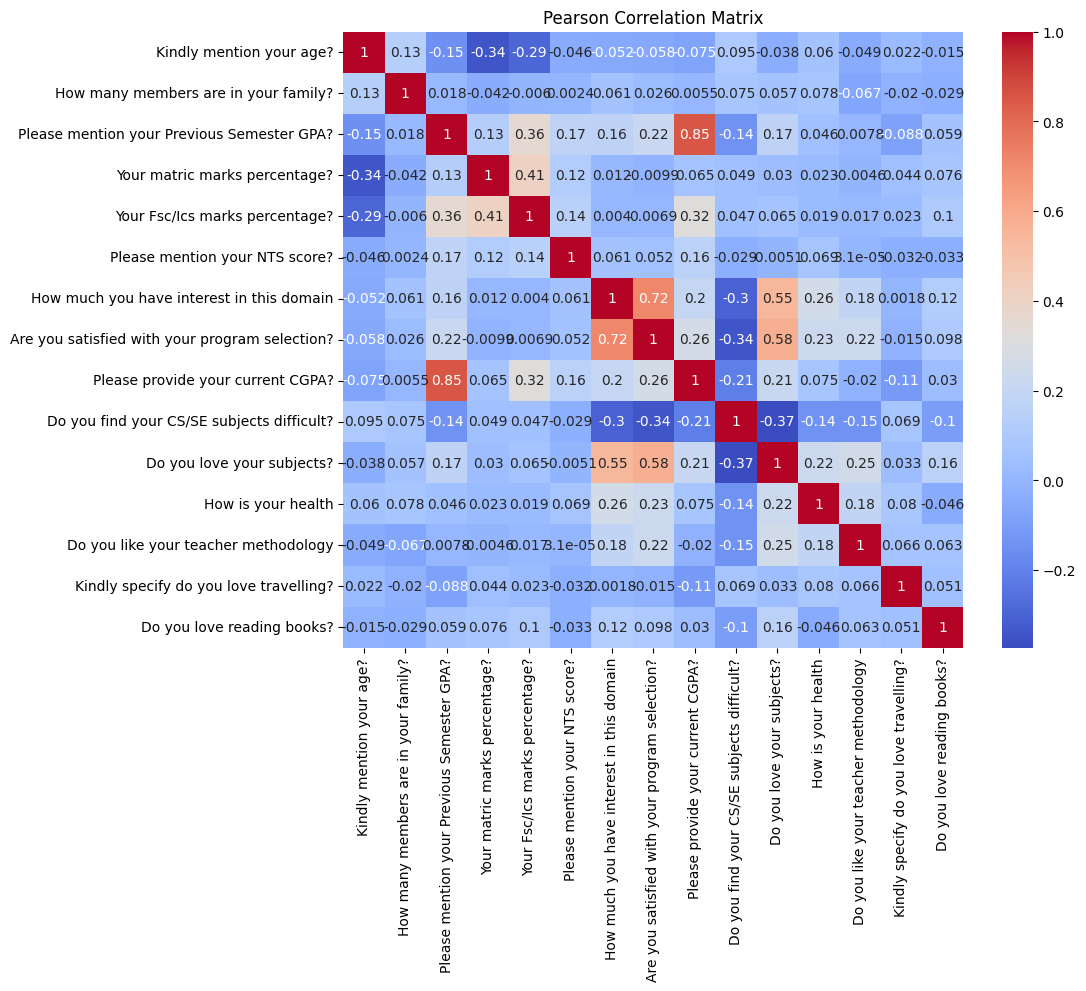

In [46]:
from sklearn.preprocessing import MinMaxScaler

def normalize(df):
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(df)
    return data_scaled

correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Pearson Correlation Matrix")
plt.show()

X = df.drop(columns =['Please mention your Previous Semester GPA?'])
X = normalize(X)

y = df['Please mention your Previous Semester GPA?']


In [47]:
len(X)


576

In [48]:
len(y)

576

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

In [53]:
# Define function to calculate PCC
def pearson_correlation_coefficient(y_true, y_pred):
    return np.corrcoef(y_true, y_pred)[0, 1]

# Define function to calculate MAPE
# def mean_absolute_percentage_error(y_true, y_pred):
#     # Avoid division by zero
#     epsilon = 1e-8
#     return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100
def mean_absolute_percentage_error(y_true, y_pred, clip_threshold=1.0):
    # Clip the values in y_true to avoid division by very small numbers (close to 0)
    y_true_clipped = np.clip(y_true, clip_threshold, np.inf)  # Clip values below `clip_threshold`
    return np.mean(np.abs((y_true_clipped - y_pred) / y_true_clipped)) * 100


# **OLS-Linear Regression**

In [54]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm
model = sm.OLS(endog=y_train, exog=X_train).fit()
y_pred = model.predict(X_test)

print("MAE Score: ", mean_absolute_error(y_test, y_pred))
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("RMSE Score: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %.2f" % r2_score(y_test,y_pred))
# print(model.summary())
print("MAPE Score: %.2f" % mean_absolute_percentage_error(y_test, y_pred))
# print("PCC: %.2f" % pearson_correlation_coefficient(y_test, y_pred))


MAE Score:  0.17602495839678461
MSE Score:  0.05333508121358308
RMSE Score:  0.2309438919165932
R2 score : 0.86
MAPE Score: 6.99


# **MultiVariable Linear Regression**

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

regression = LinearRegression()
model=regression.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE Score: ", mean_absolute_error(y_test, y_pred))
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("RMSE Score: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %.2f" %r2_score(y_test,y_pred))
print("MAPE Score: %.2f" % mean_absolute_percentage_error(y_test, y_pred))

MAE Score:  0.1296592127722749
MSE Score:  0.033859716874009405
RMSE Score:  0.1840100999239156
R2 score : 0.91
MAPE Score: 5.15


# **Decision Tree Regression**

In [57]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0)
model=regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)


print("MAE Score: ", mean_absolute_error(y_test, y_pred))
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("RMSE Score: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %.2f" %r2_score(y_test,y_pred))
print("MAPE Score: %.2f" % mean_absolute_percentage_error(y_test, y_pred))

MAE Score:  0.20215517241379313
MSE Score:  0.11143798275862071
RMSE Score:  0.3338232807319177
R2 score : 0.70
MAPE Score: 8.89


# **Polynomial Regression**

In [58]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
model=regressor.fit(X_poly, y_train)
y_pred = model.predict(poly_reg.transform(X_test))

print("MAE Score: ", mean_absolute_error(y_test, y_pred))
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("RMSE Score: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %.2f" %r2_score(y_test,y_pred))
print("MAPE Score: %.2f" % mean_absolute_percentage_error(y_test, y_pred))

MAE Score:  0.6200946536737013
MSE Score:  0.889205309498045
RMSE Score:  0.942976834019821
R2 score : -1.36
MAPE Score: 25.40


# **Random Forest Regression**

In [59]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
model=regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE Score: ", mean_absolute_error(y_test, y_pred))
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("RMSE Score: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %.2f" %r2_score(y_test,y_pred))
print("MAPE Score: %.2f" % mean_absolute_percentage_error(y_test, y_pred))

MAE Score:  0.14154310344827584
MSE Score:  0.036173074310344826
RMSE Score:  0.19019220360031802
R2 score : 0.90
MAPE Score: 5.70


# **WITH VIF**

In [102]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeRegressor

# Load dataset
df  = pd.read_csv('students_responses_main.csv')
df_org = df.copy()
df.head()

# Data cleaning steps
df.drop(columns= df.columns[88], inplace=True)
df.drop(columns= df.columns[74], inplace=True)
df.drop(columns= df.columns[58], inplace=True)
df.drop(columns = df.columns[12:50], inplace=True)
df.drop(columns= df.columns[10], inplace=True)
df.drop(columns= df.columns[8], inplace=True)
df.drop(columns= df.columns[7], inplace=True)
df.drop(columns= df.columns[0], inplace=True)

# Modify the semester column
df['Kindly choose your current semester.'] = df['Kindly choose your current semester.'].str.replace('2 Semester','1 Semester',regex=True).str.replace('3 Semester','2 Semester',regex=True).str.replace ('4 Semester','3 Semester',regex=True).str.replace ('5 Semester','4 Semester',regex=True).str.replace ('6 Semester','5 Semester',regex=True).str.replace('7 Semester','6 Semester',regex=True).str.replace('8 Semester','7 Semester',regex=True)

# Fix the matric and Fsc/Ics marks
df['Your matric marks percentage?'] = np.where(df['Your matric marks percentage?'] > 100,
                                               df['Your matric marks percentage?'] * 100 / 1100,
                                               df['Your matric marks percentage?'])

df["Your Fsc/Ics marks percentage?"] = np.where(df["Your Fsc/Ics marks percentage?"] > 100,
                                                df["Your Fsc/Ics marks percentage?"]* 100/1100,
                                                df["Your Fsc/Ics marks percentage?"])

df.round(decimals=2)

# Handle outliers using IQR method
df = df.select_dtypes(include=['number'])
Q1 = df.quantile(0.15)
Q3 = df.quantile(0.85)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Factorize categorical columns
def factorize_fun(data):
    obj_cols = data.loc[:, data.dtypes == object].columns
    for col in obj_cols:
        data[col] = pd.factorize(data[col])[0] +1
    return data

df = factorize_fun(df)

# Impute missing values using KNN
def knn_null(df):
    imputer = KNNImputer(n_neighbors=2)
    df1 = imputer.fit_transform(df)
    df2 = pd.DataFrame(df1, columns = df.columns)
    return df2

df = knn_null(df)

# Split data into features (X) and target (y)
X = df.drop(columns=['Please mention your Previous Semester GPA?'])
y = df['Please mention your Previous Semester GPA?']

# Normalize the features
def normalize(df):
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(df)
    return pd.DataFrame(data_scaled, columns=df.columns)  # Return DataFrame to retain column names

X = normalize(X)

# Calculate VIF function
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Calculate VIF before training
vif_data = calculate_vif(X)
print("VIF values:\n", vif_data)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

print("ols linear Regression")
model = sm.OLS(endog=y_train, exog=X_train).fit()
y_pred = model.predict(X_test)

print("MAE Score: ", mean_absolute_error(y_test, y_pred))
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("RMSE Score: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %.2f" % r2_score(y_test,y_pred))

print("MAPE Score: %.2f" % mean_absolute_percentage_error(y_test, y_pred))

print("multivariable linear Regression")
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

regression = LinearRegression()
model=regression.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE Score: ", mean_absolute_error(y_test, y_pred))
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("RMSE Score: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %.2f" %r2_score(y_test,y_pred))
print("MAPE Score: %.2f" % mean_absolute_percentage_error(y_test, y_pred))

print("Decission Tree")
regressor = DecisionTreeRegressor(random_state = 0)
model=regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)


print("MAE Score: ", mean_absolute_error(y_test, y_pred))
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("RMSE Score: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %.2f" %r2_score(y_test,y_pred))
print("MAPE Score: %.2f" % mean_absolute_percentage_error(y_test, y_pred))


print("Polynomial Regression")


poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
model=regressor.fit(X_poly, y_train)
y_pred = model.predict(poly_reg.transform(X_test))

print("MAE Score: ", mean_absolute_error(y_test, y_pred))
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("RMSE Score: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %.2f" %r2_score(y_test,y_pred))
print("MAPE Score: %.2f" % mean_absolute_percentage_error(y_test, y_pred))



print("RandomForestRegressor")
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
model=regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE Score: ", mean_absolute_error(y_test, y_pred))
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("RMSE Score: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %.2f" %r2_score(y_test,y_pred))
print("MAPE Score: %.2f" % mean_absolute_percentage_error(y_test, y_pred))
# Additional regression models can be added here as needed.


VIF values:
                                            Feature        VIF
0                         Kindly mention your age?   6.384932
1             How many members are in your family?   8.232514
2                    Your matric marks percentage?  22.613749
3                   Your Fsc/Ics marks percentage?  19.907205
4                   Please mention your NTS score?  16.950544
5        How much you have interest in this domain  19.168231
6   Are you satisfied with your program selection?  16.238032
7                Please provide your current CGPA?  18.041881
8       Do you find your CS/SE subjects difficult?   7.351020
9                       Do you love your subjects?  10.264592
10                              How is your health   9.176392
11            Do you like your teacher methodology   5.815915
12          Kindly specify do you love travelling?   7.382705
13                      Do you love reading books?   3.425937
ols linear Regression
MAE Score:  0.17602495839678453
MSE

# **Mutual information**

In [101]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('students_responses_main.csv')
df_org = df.copy()
df.head()

# Data cleaning steps
df.drop(columns= df.columns[88], inplace=True)
df.drop(columns= df.columns[74], inplace=True)
df.drop(columns= df.columns[58], inplace=True)
df.drop(columns = df.columns[12:50], inplace=True)
df.drop(columns= df.columns[10], inplace=True)
df.drop(columns= df.columns[8], inplace=True)
df.drop(columns= df.columns[7], inplace=True)
df.drop(columns= df.columns[0], inplace=True)

# Modify the semester column
df['Kindly choose your current semester.'] = df['Kindly choose your current semester.'].str.replace('2 Semester','1 Semester',regex=True).str.replace('3 Semester','2 Semester',regex=True).str.replace ('4 Semester','3 Semester',regex=True).str.replace ('5 Semester','4 Semester',regex=True).str.replace ('6 Semester','5 Semester',regex=True).str.replace('7 Semester','6 Semester',regex=True).str.replace('8 Semester','7 Semester',regex=True)

# Fix the matric and Fsc/Ics marks
df['Your matric marks percentage?'] = np.where(df['Your matric marks percentage?'] > 100,
                                               df['Your matric marks percentage?'] * 100 / 1100,
                                               df['Your matric marks percentage?'])

df["Your Fsc/Ics marks percentage?"] = np.where(df["Your Fsc/Ics marks percentage?"] > 100,
                                                df["Your Fsc/Ics marks percentage?"]* 100/1100,
                                                df["Your Fsc/Ics marks percentage?"])

df.round(decimals=2)

# Handle outliers using IQR method
df = df.select_dtypes(include=['number'])
Q1 = df.quantile(0.15)
Q3 = df.quantile(0.85)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Factorize categorical columns
def factorize_fun(data):
    obj_cols = data.loc[:, data.dtypes == object].columns
    for col in obj_cols:
        data[col] = pd.factorize(data[col])[0] +1
    return data

df = factorize_fun(df)

# Impute missing values using KNN
def knn_null(df):
    imputer = KNNImputer(n_neighbors=2)
    df1 = imputer.fit_transform(df)
    df2 = pd.DataFrame(df1, columns = df.columns)
    return df2

df = knn_null(df)

# Split data into features (X) and target (y)
X = df.drop(columns=['Please mention your Previous Semester GPA?'])
y = df['Please mention your Previous Semester GPA?']

# Normalize the features
def normalize(df):
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(df)
    return pd.DataFrame(data_scaled, columns=df.columns)  # Return DataFrame to retain column names

X = normalize(X)

# Mutual Information for Feature Selection (regression)
def mutual_info_selection(X, y, k=10):
    # Select top k features based on mutual information for regression
    mi_selector = SelectKBest(mutual_info_regression, k=k)
    X_new = mi_selector.fit_transform(X, y)
    selected_columns = X.columns[mi_selector.get_support()]
    print(f"Selected features after Mutual Information test: {selected_columns}")
    return X_new, selected_columns

X_new, selected_columns = mutual_info_selection(X, y, k=10)

# Train-test split with selected features
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.1, random_state=4)

# Linear Regression Model
print("ols linear Regression")
model = sm.OLS(endog=y_train, exog=X_train).fit()
y_pred = model.predict(X_test)

print("MAE Score: ", mean_absolute_error(y_test, y_pred))
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("RMSE Score: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %.2f" % r2_score(y_test,y_pred))

print("MAPE Score: %.2f" % mean_absolute_percentage_error(y_test, y_pred))

print("multivariable linear Regression")
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

regression = LinearRegression()
model=regression.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE Score: ", mean_absolute_error(y_test, y_pred))
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("RMSE Score: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %.2f" %r2_score(y_test,y_pred))
print("MAPE Score: %.2f" % mean_absolute_percentage_error(y_test, y_pred))

print("Decission Tree")
regressor = DecisionTreeRegressor(random_state = 0)
model=regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)


print("MAE Score: ", mean_absolute_error(y_test, y_pred))
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("RMSE Score: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %.2f" %r2_score(y_test,y_pred))
print("MAPE Score: %.2f" % mean_absolute_percentage_error(y_test, y_pred))


print("Polynomial Regression")


poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
model=regressor.fit(X_poly, y_train)
y_pred = model.predict(poly_reg.transform(X_test))

print("MAE Score: ", mean_absolute_error(y_test, y_pred))
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("RMSE Score: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %.2f" %r2_score(y_test,y_pred))
print("MAPE Score: %.2f" % mean_absolute_percentage_error(y_test, y_pred))



print("RandomForestRegressor")
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
model=regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE Score: ", mean_absolute_error(y_test, y_pred))
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("RMSE Score: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %.2f" %r2_score(y_test,y_pred))
print("MAPE Score: %.2f" % mean_absolute_percentage_error(y_test, y_pred))

Selected features after Mutual Information test: Index(['Kindly mention your age?', 'How many members are in your family?',
       'Your matric marks percentage?', 'Your Fsc/Ics marks percentage?',
       'Please mention your NTS score?',
       'Are you satisfied with your program selection?',
       'Please provide your current CGPA?',
       'Do you find your CS/SE subjects difficult?',
       'Do you love your subjects?', 'Do you love reading books?'],
      dtype='object')
ols linear Regression
MAE Score:  0.1889869272698487
MSE Score:  0.05780043915320963
RMSE Score:  0.24041721891996345
R2 score : 0.85
MAPE Score: 7.53
multivariable linear Regression
MAE Score:  0.13233259713252263
MSE Score:  0.033889440853592086
RMSE Score:  0.18409084945643572
R2 score : 0.91
MAPE Score: 5.25
Decission Tree
MAE Score:  0.1874137931034483
MSE Score:  0.07746720689655172
RMSE Score:  0.2783293137571961
R2 score : 0.79
MAPE Score: 7.95
Polynomial Regression
MAE Score:  1.4037020292867046
MSE Sco

# **CHI-square**

In [99]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer

# Load dataset
df = pd.read_csv('students_responses_main.csv')
df_org = df.copy()

# Data cleaning steps
df.drop(columns= df.columns[88], inplace=True)
df.drop(columns= df.columns[74], inplace=True)
df.drop(columns= df.columns[58], inplace=True)
df.drop(columns = df.columns[12:50], inplace=True)
df.drop(columns= df.columns[10], inplace=True)
df.drop(columns= df.columns[8], inplace=True)
df.drop(columns= df.columns[7], inplace=True)
df.drop(columns= df.columns[0], inplace=True)

# Modify the semester column
df['Kindly choose your current semester.'] = df['Kindly choose your current semester.'].str.replace('2 Semester','1 Semester',regex=True).str.replace('3 Semester','2 Semester',regex=True).str.replace ('4 Semester','3 Semester',regex=True).str.replace ('5 Semester','4 Semester',regex=True).str.replace ('6 Semester','5 Semester',regex=True).str.replace('7 Semester','6 Semester',regex=True).str.replace('8 Semester','7 Semester',regex=True)

# Fix the matric and Fsc/Ics marks
df['Your matric marks percentage?'] = np.where(df['Your matric marks percentage?'] > 100,
                                               df['Your matric marks percentage?'] * 100 / 1100,
                                               df['Your matric marks percentage?'])

df["Your Fsc/Ics marks percentage?"] = np.where(df["Your Fsc/Ics marks percentage?"] > 100,
                                                df["Your Fsc/Ics marks percentage?"]* 100/1100,
                                                df["Your Fsc/Ics marks percentage?"])

df.round(decimals=2)

# Handle outliers using IQR method
df = df.select_dtypes(include=['number'])
Q1 = df.quantile(0.15)
Q3 = df.quantile(0.85)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Factorize categorical columns
def factorize_fun(data):
    obj_cols = data.loc[:, data.dtypes == object].columns
    for col in obj_cols:
        data[col] = pd.factorize(data[col])[0] +1
    return data

df = factorize_fun(df)

# Impute missing values using KNN
def knn_null(df):
    imputer = KNNImputer(n_neighbors=2)
    df1 = imputer.fit_transform(df)
    df2 = pd.DataFrame(df1, columns = df.columns)
    return df2

df = knn_null(df)

# Split data into features (X) and target (y)
X = df.drop(columns=['Please mention your Previous Semester GPA?'])
y = df['Please mention your Previous Semester GPA?']

# Normalize the features
def normalize(df):
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(df)
    return pd.DataFrame(data_scaled, columns=df.columns)  # Return DataFrame to retain column names

X = normalize(X)

# Discretize the target variable to make it categorical
def discretize_target(y, n_bins=5):
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
    y_discretized = discretizer.fit_transform(y.values.reshape(-1, 1))
    return y_discretized.flatten()  # Flatten the array to avoid shape issues

y_discretized = discretize_target(y)

# Chi-Square feature selection
def chi_square_selection(X, y, k=10):
    chi2_selector = SelectKBest(chi2, k=k)
    X_new = chi2_selector.fit_transform(X, y)
    selected_columns = X.columns[chi2_selector.get_support()]
    print(f"Selected features after Chi-Square test: {selected_columns}")
    return X_new, selected_columns

X_new, selected_columns = chi_square_selection(X, y_discretized, k=10)

# Train-test split with selected features
X_train, X_test, y_train, y_test = train_test_split(X_new, y_discretized, test_size=0.1, random_state=4)

print("ols linear Regression")
model = sm.OLS(endog=y_train, exog=X_train).fit()
y_pred = model.predict(X_test)

print("MAE Score: ", mean_absolute_error(y_test, y_pred))
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("RMSE Score: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %.2f" % r2_score(y_test,y_pred))

print("MAPE Score: %.2f" % mean_absolute_percentage_error(y_test, y_pred))

print("multivariable linear Regression")
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

regression = LinearRegression()
model=regression.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE Score: ", mean_absolute_error(y_test, y_pred))
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("RMSE Score: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %.2f" %r2_score(y_test,y_pred))
print("MAPE Score: %.2f" % mean_absolute_percentage_error(y_test, y_pred))

print("Decission Tree")
regressor = DecisionTreeRegressor(random_state = 0)
model=regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)


print("MAE Score: ", mean_absolute_error(y_test, y_pred))
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("RMSE Score: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %.2f" %r2_score(y_test,y_pred))
print("MAPE Score: %.2f" % mean_absolute_percentage_error(y_test, y_pred))


print("Polynomial Regression")


poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
model=regressor.fit(X_poly, y_train)
y_pred = model.predict(poly_reg.transform(X_test))

print("MAE Score: ", mean_absolute_error(y_test, y_pred))
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("RMSE Score: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %.2f" %r2_score(y_test,y_pred))
print("MAPE Score: %.2f" % mean_absolute_percentage_error(y_test, y_pred))



print("RandomForestRegressor")
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
model=regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE Score: ", mean_absolute_error(y_test, y_pred))
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("RMSE Score: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %.2f" %r2_score(y_test,y_pred))
print("MAPE Score: %.2f" % mean_absolute_percentage_error(y_test, y_pred))
# Additional regression models can be added here as needed.


Selected features after Chi-Square test: Index(['Kindly mention your age?', 'Your Fsc/Ics marks percentage?',
       'Please mention your NTS score?',
       'How much you have interest in this domain',
       'Are you satisfied with your program selection?',
       'Please provide your current CGPA?',
       'Do you find your CS/SE subjects difficult?',
       'Do you love your subjects?', 'Kindly specify do you love travelling?',
       'Do you love reading books?'],
      dtype='object')
ols linear Regression
MAE Score:  0.32065001407786314
MSE Score:  0.16178317555065774
RMSE Score:  0.40222279342505907
R2 score : 0.78
MAPE Score: 14.96
multivariable linear Regression
MAE Score:  0.3208970026848095
MSE Score:  0.16203681431437308
RMSE Score:  0.4025379663017801
R2 score : 0.78
MAPE Score: 14.98
Decission Tree
MAE Score:  0.39655172413793105
MSE Score:  0.43103448275862066
RMSE Score:  0.6565321642986127
R2 score : 0.42
MAPE Score: 17.10
Polynomial Regression
MAE Score:  2.392383260